#### Analysis of muscimol data
Data needs to be grouped using 'Bpod_Analysis_MergeAnimals' before

In [1]:
%load_ext autoreload
%autoreload 2
from utils import plot_utils, Lapse_model
from utils import custom_functions as cuf

import os
import sys
#sys.path.append("../") # go to parent 
from OpenEphys_Analysis.utils.custom_functions import update_progress
import glob
import ntpath
import matplotlib
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import math
import seaborn as sns
import pandas as pd
import warnings
from itertools import chain

warnings.filterwarnings('ignore')

In [2]:
# path to the dataset
data_directory = cuf.get_data_folder() + '/Behavioural_Data/Bpod_data/D1-2-caspase-POST_Analysis/'
# dataframe name
df_name = 'D1-2-caspase-POST_dataframe.pkl'

# Read the dataframe
df_to_plot = pd.read_pickle(data_directory + df_name)

In [5]:
# Use this to see the session IDs for a particular animal and select the ones you want
df_to_plot[df_to_plot.AnimalID == 'A2A07'].SessionID.unique()

array(['A2A07 Feb04 14:19', 'A2A07 Feb05 13:16', 'A2A07 Feb06 13:19',
       'A2A07 Feb07 09:27', 'A2A07 Feb08 11:51', 'A2A07 Feb10 14:25',
       'A2A07 Feb11 13:35', 'A2A07 Feb12 14:03', 'A2A07 Feb13 13:00',
       'A2A07 Feb14 12:30', 'A2A07 Feb17 11:54', 'A2A07 Feb20 15:17',
       'A2A07 Feb21 15:04', 'A2A07 Feb24 13:56', 'A2A07 Feb25 10:36',
       'A2A07 Feb26 11:01', 'A2A07 Feb27 10:47', 'A2A07 Feb27 11:16',
       'A2A07 Apr02 12:11', 'A2A07 Apr03 12:25', 'A2A07 Apr04 13:17',
       'A2A07 Apr05 13:46'], dtype=object)

In [14]:
# select particular sessions to keep
sessionIDs_tokeep = ['FITM01 Feb17 13:00', 'FITM01 Feb20 15:16',
                       'FITM01 Feb21 14:59', 'FITM01 Feb24 13:53', 'FITM01 Feb25 10:31',
                       'FITM01 Feb26 11:17', 'FITM01 Apr02 12:08', 'FITM01 Apr03 12:23',
                       'FITM01 Apr04 13:21', 'FITM01 Apr05 13:44',
                       'FITM02 Feb17 13:00', 'FITM02 Feb20 15:16', 'FITM02 Feb21 14:59',
                       'FITM02 Feb24 13:53', 'FITM02 Feb25 10:32', 'FITM02 Feb26 10:58',
                       'FITM02 Apr02 12:08', 'FITM02 Apr03 12:24', 'FITM02 Apr04 13:21',
                       'FITM02 Apr05 13:44',
                     'FITM03 Feb17 13:00', 'FITM03 Feb20 15:16', 'FITM03 Feb21 14:59',
       'FITM03 Feb24 13:51', 'FITM03 Feb25 11:01',
       'FITM03 Feb26 10:58', 'FITM03 Apr02 12:08', 'FITM03 Apr03 12:24',
       'FITM03 Apr04 13:21', 'FITM03 Apr05 13:45',
                     'CTRL01 Feb17 12:27', 'CTRL01 Feb20 17:32',
       'CTRL01 Feb21 13:48', 'CTRL01 Feb24 15:30', 'CTRL01 Feb25 11:34',
       'CTRL01 Feb26 12:32', 'CTRL01 Apr02 11:09', 'CTRL01 Apr03 11:10',
       'CTRL01 Apr04 11:51', 'CTRL01 Apr05 12:25',
                     'CTRL02 Feb17 12:27',
       'CTRL02 Feb20 17:32', 'CTRL02 Feb21 13:47', 'CTRL02 Feb24 15:30',
       'CTRL02 Feb25 11:34', 'CTRL02 Feb26 11:55', 'CTRL02 Apr02 11:08',
       'CTRL02 Apr03 11:10', 'CTRL02 Apr04 11:51', 'CTRL02 Apr05 12:25',
                     'CTRL03 Feb17 12:28', 'CTRL03 Feb20 15:49',
       'CTRL03 Feb21 13:44', 'CTRL03 Feb24 14:47', 'CTRL03 Feb25 11:34',
       'CTRL03 Feb26 11:56', 'CTRL03 Apr02 11:17', 'CTRL03 Apr03 11:11',
       'CTRL03 Apr04 11:52', 'CTRL03 Apr05 12:27',
                     'CTRL04 Feb17 12:28', 'CTRL04 Feb20 17:32',
       'CTRL04 Feb21 13:50', 'CTRL04 Feb24 15:30', 'CTRL04 Feb25 12:12',
       'CTRL04 Feb26 12:33', 'CTRL04 Apr02 11:09', 'CTRL04 Apr03 11:10',
       'CTRL04 Apr04 11:52', 'CTRL04 Apr05 12:26',
                     'A2A04 Feb17 11:53', 'A2A04 Feb20 15:45',
       'A2A04 Feb21 15:03', 'A2A04 Feb24 14:43', 'A2A04 Feb25 11:31',
       'A2A04 Feb26 11:53', #'A2A04 Feb26 12:08',
                     'A2A04 Apr02 11:28',
       'A2A04 Apr03 11:24', 'A2A04 Apr05 14:19',
                     'A2A05 Feb17 11:53', 'A2A05 Feb20 15:46',
       'A2A05 Feb24 14:43', 'A2A05 Feb25 11:31',
       'A2A05 Feb26 11:53', 'A2A05 Feb27 10:45', #'A2A05 Feb27 11:15',
       'A2A05 Apr02 12:12', 'A2A05 Apr03 12:26', 'A2A05 Apr05 14:47',
                     'A2A06 Feb17 11:53', 'A2A06 Feb20 15:46',
       'A2A06 Feb21 15:03', 'A2A06 Feb24 14:44', 'A2A06 Feb25 11:31',
       'A2A06 Feb25 11:45', 'A2A06 Feb26 11:53', 'A2A06 Apr02 12:12',
       'A2A06 Apr03 12:25', 'A2A06 Apr04 13:17', 'A2A06 Apr05 13:46',
                     'A2A07 Feb17 11:54', 'A2A07 Feb20 15:17',
       'A2A07 Feb21 15:04', 'A2A07 Feb24 13:56', 'A2A07 Feb25 10:36',
       'A2A07 Feb26 11:01', 'A2A07 Feb27 10:47', #'A2A07 Feb27 11:16',
       'A2A07 Apr02 12:11', 'A2A07 Apr03 12:25', 'A2A07 Apr04 13:17',
       'A2A07 Apr05 13:46'
]


df_to_plot = df_to_plot[(df_to_plot['SessionID'].isin(sessionIDs_tokeep))]

In [7]:
# types of protocols
df_to_plot.Protocol.unique()

array(['Auditory', 'Aud_Psycho'], dtype=object)

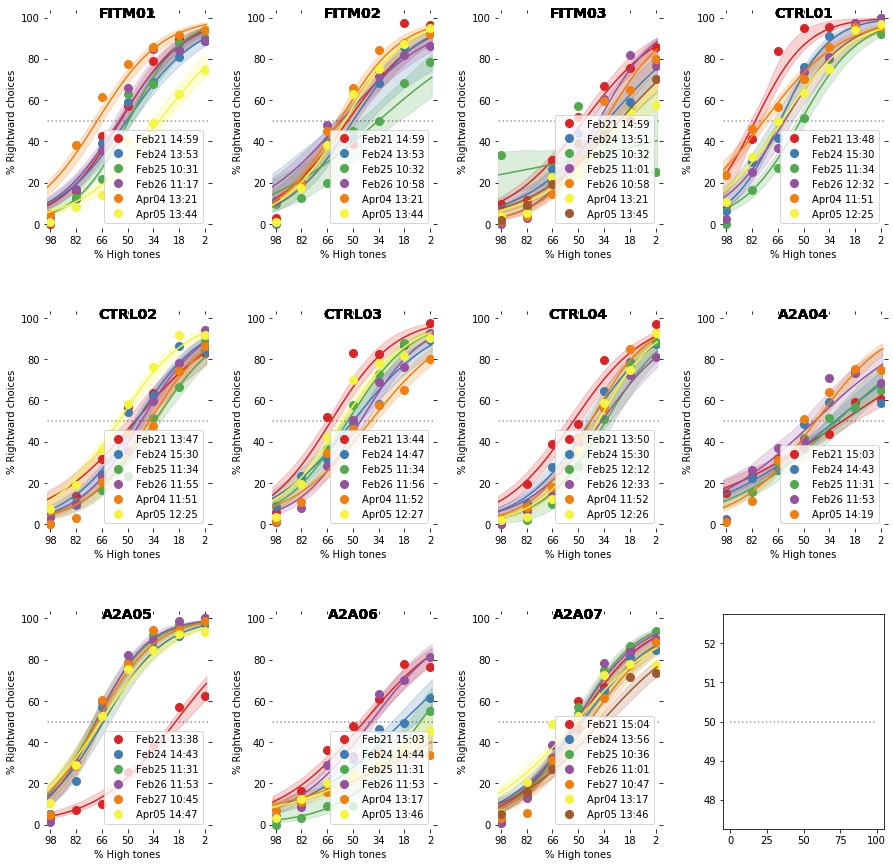

In [9]:
prot = 'Aud_Psycho'

# prepare colors
my_palette = "Set1"
AnimalList = list(df_to_plot.AnimalID.unique())
ColorList = sns.color_palette(my_palette, n_colors=len(AnimalList), desat=.9)

# plot per animal and per session
nanims = len(df_to_plot.AnimalID.unique())
fig, axs = plt.subplots(3, 4, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace=.4, wspace=.4)
axs = axs.ravel()
for ax in axs:
    ax.hlines(50, 0, 100, linestyles='dotted' , alpha=0.4)

axcounter = 0
for animal in df_to_plot.AnimalID.unique():
    andf = df_to_plot[np.logical_and(df_to_plot.AnimalID == animal, df_to_plot.Protocol == prot)]
    ax = axs[axcounter]
    axcounter += 1
    
    for muscounter, muscimol_condition in enumerate(andf.SessionTime.unique()):
        df = andf[andf.SessionTime == muscimol_condition]
        predictDif, PsyPer, fakePredictions, predictPer, _ = cuf.PP_ProcessExperiment(df, bootstrap=100)
        plot_utils.PlotPsychPerformance(dataDif=PsyPer['Difficulty'], dataPerf=PsyPer['Performance'],
                                        predictDif=predictDif, ax=ax, fakePred=fakePredictions,
                                        realPred=predictPer, label=muscimol_condition,
                                        color=ColorList[muscounter])
        ax.text(50, 100, animal, horizontalalignment='center', fontsize=14, fontweight='bold')
        ax.legend(loc='lower right')
    #update_progress(axcounter / len(axs))

#update_progress(1)

plt.savefig(data_directory + 'psychometric_comparison_' + prot + '.pdf', transparent=True, bbox_inches='tight')    
plt.show(fig)

In [ ]:
# produce simpler metrics
# rename each session such that it is -2, -1, 0, 1, 2 ... as if 0 represents the fist session post surgery
# then plot the percentage of correct choices by experimental group in each session

In [30]:
#group by sessionID and calculate percentage correct
df_perc_correct = df_to_plot.groupby(['ExperimentalGroup', 'AnimalID', 'FullSessionTime', 'SessionTime',
           'SessionID', 'Protocol']).mean().reset_index()[['AnimalID', 'ExperimentalGroup', 'SessionTime',
                                                           'FullSessionTime','SessionID', 'Protocol', 'FirstPokeCorrect']]

In [31]:
def get_index_of_first_session_post_surgery(timelist):
    return [i for i, x in enumerate(np.diff(timelist) > np.timedelta64(1000000000000000, 'ns')) if x][0] + 1

In [32]:
# optional select one protocol
df_perc_correct = df_perc_correct[df_perc_correct.Protocol=='Auditory']

In [33]:
# get the indexes
full_idx_list = []
for animal in df_perc_correct.AnimalID.unique():
    an_df = df_perc_correct[df_perc_correct.AnimalID == animal]
    sorted_dates = np.sort(an_df.FullSessionTime.unique())
    s_d_indeces = np.array(range(len(sorted_dates))) - get_index_of_first_session_post_surgery(sorted_dates)
    for fst in an_df.FullSessionTime.unique():
        full_idx_list.append(s_d_indeces[np.where(sorted_dates==fst)[0][0]])
df_perc_correct['SurgerySessionIndex'] = full_idx_list

In [34]:
df_perc_correct[df_perc_correct.SurgerySessionIndex==0]

,AnimalID,ExperimentalGroup,SessionTime,FullSessionTime,SessionID,Protocol,FirstPokeCorrect,SurgerySessionIndex
6,CTRL01,Control,Apr02 11:09,2020-04-02 11:09:00,CTRL01 Apr02 11:09,Auditory,0.875325,0
16,CTRL02,Control,Apr02 11:08,2020-04-02 11:08:00,CTRL02 Apr02 11:08,Auditory,0.834197,0
26,CTRL03,Control,Apr02 11:17,2020-04-02 11:17:00,CTRL03 Apr02 11:17,Auditory,0.740891,0
36,CTRL04,Control,Apr02 11:09,2020-04-02 11:09:00,CTRL04 Apr02 11:09,Auditory,0.886905,0
46,FITM01,D1Cre-caspase-post,Apr02 12:08,2020-04-02 12:08:00,FITM01 Apr02 12:08,Auditory,0.900452,0
56,FITM02,D1Cre-caspase-post,Apr02 12:08,2020-04-02 12:08:00,FITM02 Apr02 12:08,Auditory,0.796667,0
66,FITM03,D1Cre-caspase-post,Apr02 12:08,2020-04-02 12:08:00,FITM03 Apr02 12:08,Auditory,0.768932,0
76,A2A04,D2Cre-caspase-post,Apr02 11:28,2020-04-02 11:28:00,A2A04 Apr02 11:28,Auditory,0.780604,0
85,A2A05,D2Cre-caspase-post,Apr02 12:12,2020-04-02 12:12:00,A2A05 Apr02 12:12,Auditory,0.753555,0
95,A2A06,D2Cre-caspase-post,Apr02 12:12,2020-04-02 12:12:00,A2A06 Apr02 12:12,Auditory,0.756868,0


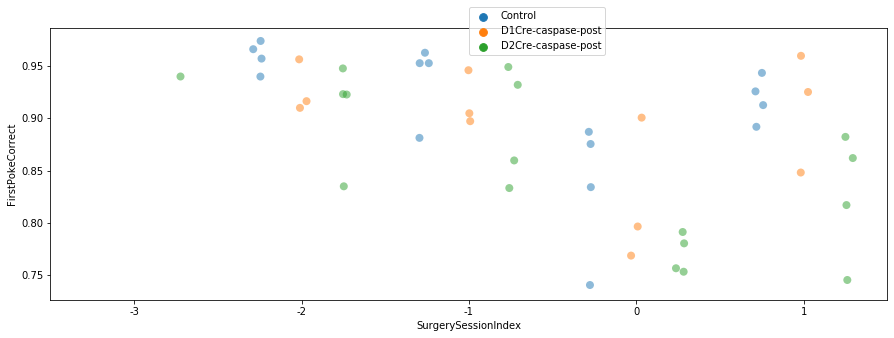

In [35]:
fig, axs = plt.subplots(1, 1, figsize=(15, 5), facecolor='w', edgecolor='k')
sns.stripplot(data=df_perc_correct, x='SurgerySessionIndex', y='FirstPokeCorrect', hue='ExperimentalGroup',
              dodge=True, jitter=True,
              alpha=.5, zorder=1, size=8)
plt.gca().legend(bbox_to_anchor=(.5, .9), loc=0, borderaxespad=0.)
plt.savefig(data_directory + 'SurgerySessionIndex.pdf', transparent=True, bbox_inches='tight')
plt.show()

In [69]:
get_index_of_first_session_post_surgery('A2A06')

7